### analisi colonne:

| Nome colonna | | Descrizione |
| - | | - | 
| car_ID | | Id del veicolo | 
| symboling | | Valore del rischio assicurativo (3 alto, -3 basso) | 
| carName | | Marca e modello | 
| fueltype | | Alimentazione | 
| aspiration | | Aspirazione motore (standard o turbo) | 
| doornumber | | Numero di porte |
| carbody | | Tipo di veicolo | 
| drivewheel | | Trazione (anteriore, posteriore o 4x4) | 
| enginelocation | | Posizione motore (anteriore o posteriore) | 
| wheelbase | | Passo (distanza fra ruote) | 
| carlength | | Lunghezza veicolo | 
| carwidth | | Largezza veicolo | 
| carheight | | Altezza veicolo | 
| curbweight | | Peso veicolo a vuoto (senza passeggeri) | 
| cylindernumber | | Numero di cilindri | 
| enginesize | | Dimensione motore | 
| horsepower | | Numero di cavalli | 
| peakrpm | | Numero massimo di giri | 
| citympg | | Consumo medio in città | 
| highwaympg | | Consumo medio fuori città |
| price | | Prezzo | 

# Parte 1 - Import dei dati

In [1]:
import pandas as pd
import seaborn as sb
from sklearn import model_selection
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/CarPrice_Assignment.csv", delimiter=",")

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<AxesSubplot:>

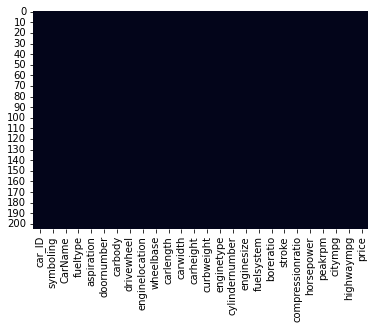

In [4]:
# verifica dati mancanti
sb.heatmap(df.isna(), cbar=False) # nessun dato mancante!

In [5]:
# verifica ID siano tanti quanti le righe (no duplicati)
len(df) == len(df['car_ID'].unique())

True

# Parte 2 - EDA

<strong>L'Exploratory Data Analysis (EDA)</strong> è lo step preliminare di ogni progetto di data science perché non si può costruire nessun modello se non conosciamo i dati con cui stiamo lavorando 😌

Le informazioni che abbiamo a disposizione si dividono principalmente in variabili numeriche e variabili categoriche👇🏼

Sicuramente è importante vedere le distribuzioni univariate delle singole variabili, ma il lavoro principale di un data scientist è investigare le distribuzioni multivariate per trovare le correlazioni tra le variabili e la target 🚀

Lo scopo di questo step è scartare le variabili che non sono correlate con la target e tenere solo quelle significative ⚡️

Nello studio delle distribuzioni univariate e bivariate dobbiamo essere preparati ad i casi di 👇🏼
<br>📍 variabile numerica --> suggeriamo un istogramma o un boxplot per vedere la forma delle code e se la media è sbilanciata
<br>📍 variabile categorica ‑‑> barplot per vedere quali categorie sono più frequenti
<br>📍 numerica vs numerica ‑‑> scatter plot
<br>📍 numerica vs categorica ‑‑> istogramma o boxplot della numerica per ogni categoria
<br>📍 categorica vs categorica ‑‑> barplot di una variabile per ogni categoria dell'altra

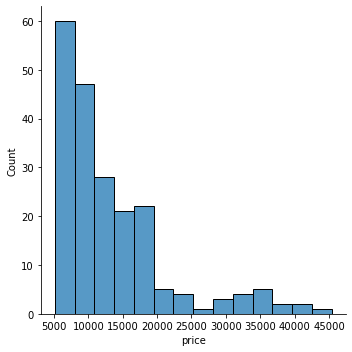

In [6]:
# vediamo la distribuzione della varibile target (prezzo)
sb.displot(x=df['price'])

<AxesSubplot:>

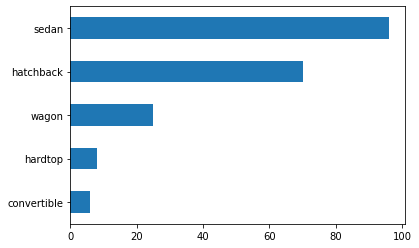

In [7]:
# analisi variabile discreta (tipo di auto)
df['carbody'].value_counts().sort_values().plot(kind='barh')

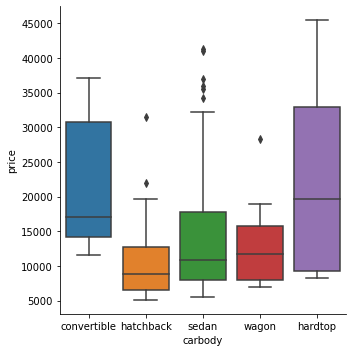

In [8]:
# vediamo se questa variabile categorica influisce sul prezzo
sb.catplot(data=df, x='carbody', y='price', kind='box') # sì, il tipo di veicolo influisce sul prezzo

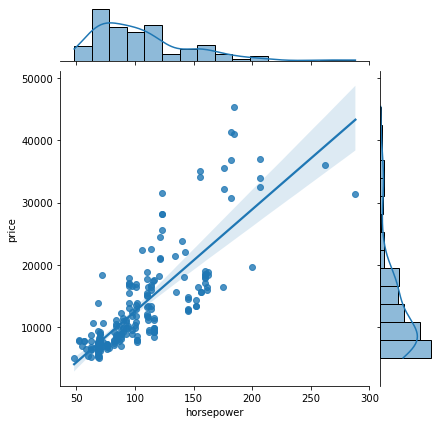

In [9]:
# vediamo se una varibile continua (cavalli) influisce sul prezzo
sb.jointplot(data=df, x='horsepower', y='price', kind='reg') # si

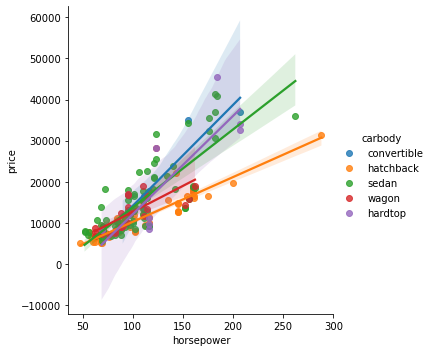

In [10]:
# vediamo assieme sulle due variabili la loro influenza sul prezzo
sb.lmplot(data=df, x='horsepower', y='price', hue='carbody')

# Parte 3 - Missing Data

I dati mancanti si verificano quando nessun valore viene memorizzato per la variabile in osservazione 🙅🏽‍♂️

Dopo la fase esplorativa si passa al Preprocessing, cioè la preparazione dei dati per il modello

Il primo step del preprocessing è gestire i dati mancanti, in quanto possono avere un effetto significativo sul modello 👇🏼

Prima di fare qualunque modifica al dataset bisogna capire cosa significa avere un NA per la variabile in analisi rispetto alla target

I dati mancanti infatti possono essere loro stessi un'informazione se hanno una correlazione con la variabile target ⚡️

Quindi la cosa più corretta da fare è capire se la target si comporta in modo diverso quando c'è un NA 🔎
<br>📌 se Si: il dato mancante è significativo e bisogna tracciarlo, non cancellarlo (ad esempio mettendo un 9999 se è una variabile numerica o "NA" se è categorica)
<br>📌 se No: il dato mancante non è rilevante e può essere rimosso dal dataset

In [11]:
# preprocessing dei dati
df_dummy = pd.get_dummies(df['carbody'], prefix='body') # trasformo la variabile categorica in numerica
df_dummy.head()

,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [12]:
df = pd.concat([df, df_dummy], axis=1)
df = df.drop('carbody', axis=1)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,...,horsepower,peakrpm,citympg,highwaympg,price,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon
0,1,3,alfa-romero giulia,gas,std,two,rwd,front,88.6,168.8,...,111,5000,21,27,13495.0,1,0,0,0,0
1,2,3,alfa-romero stelvio,gas,std,two,rwd,front,88.6,168.8,...,111,5000,21,27,16500.0,1,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,rwd,front,94.5,171.2,...,154,5000,19,26,16500.0,0,0,1,0,0
3,4,2,audi 100 ls,gas,std,four,fwd,front,99.8,176.6,...,102,5500,24,30,13950.0,0,0,0,1,0
4,5,2,audi 100ls,gas,std,four,4wd,front,99.4,176.6,...,115,5500,18,22,17450.0,0,0,0,1,0


In [13]:
# dato che ho tante colonne, analizzo come fatto prima se influiscono sul prezzo, togliendo quelle inutili
removed = ['car_ID', 'CarName', 'doornumber', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

df = df.drop(removed, axis=1)

# Parte 4 - Preprocessing

Il Preprocessing è la preparazione dei dati grezzi per renderli adatti a un modello di Machine Learning ⚙️

È una fase fondamentale di un progetto di Data Science perché non sempre (anzi mai!) ci imbattiamo in dati puliti e formattati 🙅🏽‍♂️

Solitamente gli step del Preprocessing sono: 👇🏼
<br>📌 gestione dei dati mancanti
<br>📌 resample dei dati sbilanciati (soprattutto per i problemi di classificazione)
<br>📌 trasformare le variabili categoriche in valori numerici (ad esempio dummy)
<br>📌 partitioning del dataset in train set e test set
<br>📌 scaling e normalizzazione dei dati

L'output finale del Preprocessing è una Feature Matrix (cioè una tabella con una osservazione in ogni riga e una feature in ogni colonna) pronta per il modello ⚡️

In [14]:
# trasformo variabili categoriche rimaste
df_dummy = pd.get_dummies(df['fueltype'], prefix='alimentazione')
df = pd.concat([df, df_dummy], axis=1)
df = df.drop('fueltype', axis=1)

df_dummy = pd.get_dummies(df['aspiration'], prefix='aspirazione')
df = pd.concat([df, df_dummy], axis=1)
df = df.drop('aspiration', axis=1)

df_dummy = pd.get_dummies(df['drivewheel'], prefix='trazione')
df = pd.concat([df, df_dummy], axis=1)
df = df.drop('drivewheel', axis=1)

In [15]:
# partitioning (split tra train e set)
df_train, df_test = model_selection.train_test_split(df, train_size=0.8, shuffle=True)

# assicurarsi che la media della target sia simile tra train e test
print(f"Train len: {len(df_train)}, media prezzo: {int(df_train['price'].mean())}")
print(f"Test len: {len(df_test)}, media prezzo: {int(df_test['price'].mean())}")

Train len: 164, media prezzo: 12944
Test len: 41, media prezzo: 14605


#### Scaling
standardizzazione delle variabili continue, impostandole in un range definito

#### 3 Scelte:
- Standard scaler: se ho i dati distribuiti secondo distribuzione normale
- MinMax scaler: prende valore minimo e massimo e scala basandosi su quello (affetto da outlier)
- Robust scaler: prende primo e terzo quartile per scalare

In [16]:
scalerX = preprocessing.RobustScaler()
scalerY = preprocessing.RobustScaler()

In [17]:
X_names = df_train.drop('price', axis=1).columns

In [18]:
# scaling variabili nel train
df_train[X_names] = scalerX.fit_transform(df_train[X_names])
# scaling target
df_train['price'] = scalerY.fit_transform(df_train[['price']])

df_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,body_hatchback,body_sedan,body_wagon,alimentazione_diesel,alimentazione_gas,aspirazione_std,aspirazione_turbo,trazione_4wd,trazione_fwd,trazione_rwd
59,0.0,0.260870,0.333333,0.404040,-0.111111,-0.030100,0.277457,0.205128,0.384615,-0.444444,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,-1.5,1.057971,1.130435,0.686869,0.583333,0.705686,0.716763,1.205128,-0.538462,0.555556,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
118,0.0,-0.478261,-1.152174,-0.686869,-0.916667,-0.654849,-0.462428,-0.871795,-0.230769,0.444444,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,-1.0,0.913043,0.101449,-0.363636,1.583333,0.170569,0.277457,0.102564,0.653846,-0.555556,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,-0.5,-0.014493,0.028986,-0.040404,0.222222,0.324415,-0.046243,0.794872,-2.500000,-1.444444,...,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,1.0,-1.0,0.0


In [19]:
df_test[X_names] = scalerX.transform(df_test[X_names])

# Parte 5

Siamo giunti finalmente alla fase di costruzione, training e test del modello di Machine Learning 🚀

La prima cosa da fare è provare un modello molto semplice per avere una baseline con cui comparare un modello più complesso 💥

Per poter scegliere quale modello usare bisogna prima conoscere come funziona l'algoritmo, in particolare come avviene il "learning" 🎯

Ad esempio: 👇🏼
<br>📌 Nella regressione lineare stiamo trovando i pesi delle variabili che minimizzano l'errore di previsione
<br>📌 Nei modelli ad albero stiamo trovando gli split decisionali minimizzano l'errore di previsione (cioè if x>10 then 1 else 0)
<br>📌 Nei modelli di clustering (quindi senza una variabile target) si cerca il raggruppamento dei dati che massimizzi la distanza tra i gruppi

E quindi la cosa più importante è capire bene in che modo avviene l'addestramento e la previsione, perché utilizzare modelli a caso non è il lavoro del Data Scientist ❌

In [20]:
x_train = df_train.drop('price', axis=1).values
y_train = df_train['price'].values
x_test = df_test.drop('price', axis=1).values
y_test = df_test['price'].values

In [21]:
from sklearn import linear_model
linmodel = linear_model.LinearRegression()
linmodel.fit(x_train, y_train)

preds = linmodel.predict(x_test)
preds = scalerY.inverse_transform(preds.reshape(-1, 1)).reshape(-1)

In [22]:
# utilizzo PCA per scomporre le dimensioni del piano in 2 dimensioni (al fine di fare un plot)
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
x2d_train = pca.fit_transform(x_train)
x2d_test = pca.fit_transform(x_test)

linmodel2d = linear_model.LinearRegression()
linmodel2d.fit(x2d_train, y_train)
preds2d = linmodel2d.predict(x2d_test)
preds2d = scalerY.inverse_transform(preds2d.reshape(-1, 1)).reshape(-1)

In [23]:
x2d = []
for e in x2d_test:
    x2d.append(e[0])

<AxesSubplot:>

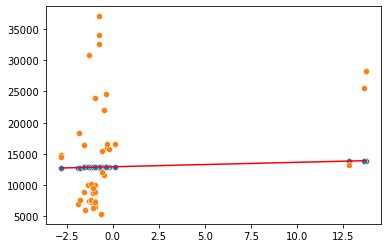

In [24]:
sb.scatterplot(x=x2d, y=preds2d)
sb.scatterplot(x=x2d, y=y_test)
sb.lineplot(x=x2d, y=preds2d, color='r')

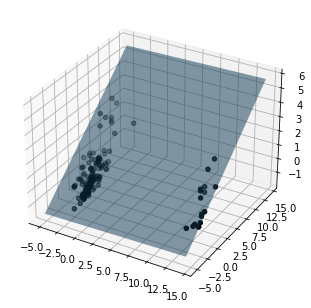

In [25]:
pca = decomposition.PCA(n_components=2)
X2d = pca.fit_transform(x_train)

model2d = linear_model.LinearRegression()
model2d.fit(X2d, y_train)

from mpl_toolkits.mplot3d import Axes3D
import numpy as np

figure = plt.figure()
ax = Axes3D(figure, auto_add_to_figure=False)
ax.scatter(X2d[:,0], X2d[:,1], y_train, color="black")
x1 = np.array([[X2d.min(), X2d.min()], [X2d.max(), X2d.max()]])
x2 = np.array([[X2d.min(), X2d.max()], [X2d.min(), X2d.max()]])
y = model2d.predict(np.array([
    [X2d.min(), X2d.min(), X2d.max(), X2d.max()], 
    [X2d.min(), X2d.max(), X2d.min(), X2d.max()]]).T
    ).reshape((2,2))
ax.plot_surface(x1, x2, y, alpha=0.5)
figure.add_axes(ax)
plt.show()

In [26]:
from sklearn import metrics
lin_r2score = metrics.r2_score(y_test, preds)
print(lin_r2score) # score del modello lineare

0.7706154809952491


In [27]:
# fatto giusto per curiosità, volendo vedere underfitting dovuto al PCA
print(metrics.r2_score(y_test, preds2d))

-0.020594226120835835


# Parte 6 - Valutazione perfomance
Come si valuta un modello di Machine Learning? ⚡️

Non esiste una risposta fissa... il KPI più appropriato dipende dallo use case del progetto e solitamente è dettato dalle persone del Business ✋🏾
<br>📌 Un KPI (Key Performance Indicator) è un valore misurabile che dimostra l'efficacia con cui un'azienda sta raggiungendo un determinato obiettivo

Facciamo degli esempi, anche un pò estremi... ma che rendono l'idea di ciò che va preso in considerazione quando si valuta un modello 👇🏼
<br>📍 In un progetto di ricerca accademico, magari puntiamo ad un R2 o AUC maggiore di chi ha pubblicato qualcosa di simile, magari per migliorare le performances del modello sul quale stiamo facendo ricerca
<br>📍 se dobbiamo prevedere i prezzi delle azioni su cui investire i nostri Euro, allora conviene tenere d'occhio il MAE (Mean Absolute Error) perché una eventuale perdita viene misurata direttamente in Euro
<br>📍 se stiamo classificando quali sospetti sono colpevoli di un crimine, conviene usare la Precision (la confidenza nel predire un 1, quindi un criminale). Questo perché sbagliare significherebbe rovinare la vita a qualcuno, magari innocente
<br>📍 se stiamo scannerizzando le valigie in aeroporto per trovare oggetti pericolosi, sarà sicuramente meglio usare la Recall (quanti 1 sono stati predetti correttamente) perché aprire una valigia innocua è meno grave che perdersi una pericolosa

In [28]:
# utilizzo di un modello più performante (XGBoost --> simile random forest, qui gli alberi correggono l'errore dell'albero prima)
from sklearn import ensemble
gboostmodel = ensemble.GradientBoostingRegressor()
gboostmodel.fit(x_train, y_train)

GradientBoostingRegressor()

In [29]:
gpred = gboostmodel.predict(x_test)
gpred = scalerY.inverse_transform(gpred.reshape(-1, 1)).reshape(-1)

gb_r2score = metrics.r2_score(y_test, gpred)
print(gb_r2score) # score del modello XGBoost
print(f"Aumento di score pari a {gb_r2score-lin_r2score}")

0.8817406561971974
Aumento di score pari a 0.11112517520194831


In [30]:
# utilizzo altre metriche (parte 6)
import numpy as np

err = y_test - gpred
errp = round(np.mean(np.abs(err)/gpred), 2)

print(f"L'errore percentuale medio è del {int(errp*100)}%")

L'errore percentuale medio è del 13%


In [31]:
d = np.mean(abs(err))
print(f"In termini di dollari, sbaglio in media di {int(d)}$")

In termini di dollari, sbaglio in media di 2094$


In [32]:
me = max(abs(err))
print(f"In termini di dollari, lo sbaglio massimo è pari a {int(me)}$")

In termini di dollari, lo sbaglio massimo è pari a 8820$


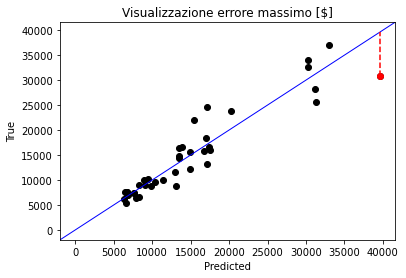

In [33]:
fig, ax = plt.subplots()
ax.scatter(gpred, y_test, color='black')
ax.axline((0,0), slope=1, linewidth=1, color='blue')

max_idx = list(abs(err)).index(max(abs(err)))
max_true = y_test[max_idx]
max_pred = gpred[max_idx]

ax.vlines(x=max_pred, ymin=max_true, ymax=max_true+max(abs(err)), color='red', linestyle='--')
ax.scatter(gpred[max_idx], y_test[max_idx], color='red')
ax.set(xlabel='Predicted', ylabel='True', title='Visualizzazione errore massimo [$]')
plt.show()

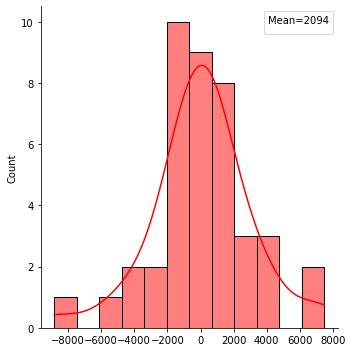

In [34]:
sb.displot(data=err, color='red', kde=True)
plt.legend(title=f"Mean={int(d)}", labels=[])
plt.show()

# Parte 7 - Spiegazione dei risultati
Hai analizzato e compreso i dati, addestrato e testato un modello, e sei persino soddisfatto del risultato... pensi di aver finito? 🧐

Sbagliato.

C'è un'alta probabilità che chi ti ha commissionato il progetto non capiscano il tuo algoritmo, o che chi lo deve utilizzare non si fidi delle previsioni ❌

Quindi devi dimostrare che il tuo modello di machine learning non è una black box (che significa "non interpretabile") ✋🏾

In altre parole, devi costruire un explainer 👇🏼

Cioè qualcosa che spieghi in modo intuitivo perché per una certa osservazione è stata fatta quella previsione.

Ad esempio perché per quella macchina è stato predetto il prezzo x.

Mostrando quali variabili spiegano la scelta degli output 💥

Un dettaglio importante da notare è che spiegare quali variabili hanno contribuito di più alla predizione è diverso da calcolare la feature importance (che invece è usata per fare Feature Selection negli step precedenti)

In [35]:
# come spiegare il modello al business --> spiegare il perchè delle predizioni, dicendo quali variabili influiscono maggiormente
print(f"Primo dato: {int(y_test[0])}$\nPredetto: {int(gpred[0])}$\nDifferenza: {int(abs(y_test[0] - gpred[0]))}$")

Primo dato: 23875$
Predetto: 20276$
Differenza: 3598$


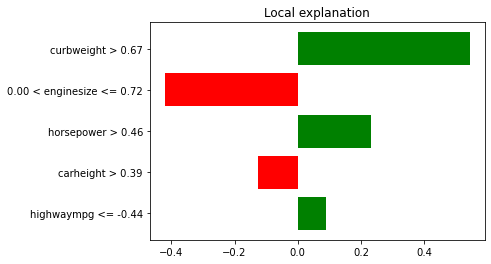

In [36]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=x_train,
    feature_names=X_names,
    class_names='Price',
    mode='regression'
)

explained = explainer.explain_instance(x_test[0], gboostmodel.predict, num_features=5)

explained.as_pyplot_figure()
plt.show()
# quello che vedo in verde sono quelle variabili che hanno portato ad alzare la stima
# quelle rosse sono quelle che hanno abbassato la stima

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


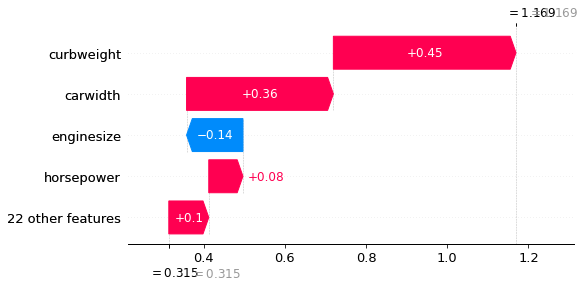

In [37]:
import shap

explainer = shap.TreeExplainer(gboostmodel)
shap_values = explainer.shap_values(x_test[0])

shap.waterfall_plot(
    explainer.expected_value[0],
    shap_values,
    feature_names=X_names,
    max_display=5
)

# mostra inoltre le altre varibili come hanno influito (ultima colonna)

# Parte 8 - Feature selection
La Feature Selection è il processo di selezione di un sottoinsieme di variabili rilevanti da utilizzare nella costruzione del modello 💥

Solitamente l'obiettivo è quello di avere il numero più basso di feature, ma che non peggiora la perfomance ottenuta con tutte le variabili.

Ma perché si fa Feature Selection?

Principalmente per 3 motivi 👇🏽
<br>📍Escludere variabili ridondanti e irrilevanti rende il processo più accurato, in particolare se c'è multicollinearità (quando c'è forte dipendenza lineare tra due o più feature)
<br>📍Capire l'effetto di ogni feature, e quindi l'explainability del modello, diventa più semplice se ci sono meno variabili
<br>📍Avere tante variabili vuol dire avere tanti dati e la manutenzione di un modello in produzione diventa più complicata

In [38]:
# matrice di correlazione --> range da -1 a 1
df.corr().style.background_gradient(cmap='Blues')

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,alimentazione_diesel,alimentazione_gas,aspirazione_std,aspirazione_turbo,trazione_4wd,trazione_fwd,trazione_rwd
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,0.279440,0.168845,0.435648,-0.378341,-0.298243,-0.194311,0.194311,0.059866,-0.059866,-0.067222,0.102839,-0.076381
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.175071,-0.008608,-0.386094,0.291086,0.210899,0.308346,-0.308346,-0.257611,0.257611,-0.069003,-0.460355,0.498830
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920,-0.051722,0.047292,-0.436269,0.269647,0.219683,0.212679,-0.212679,-0.234539,0.234539,-0.045934,-0.508714,0.538370
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,-0.026328,0.066360,-0.222308,0.154637,0.060639,0.233880,-0.233880,-0.300567,0.300567,-0.069764,-0.472116,0.511149
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336,-0.163239,-0.072328,-0.477476,0.235863,0.459148,0.284631,-0.284631,-0.087311,0.087311,0.147260,-0.100273,0.039814
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305,0.082272,0.098956,-0.287501,0.099425,0.164075,0.217275,-0.217275,-0.324902,0.324902,0.022090,-0.666039,0.669987
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145,0.126483,0.239363,-0.216805,0.088459,-0.027518,0.069594,-0.069594,-0.108217,0.108217,-0.086642,-0.518391,0.565509
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173,0.104056,0.208089,-0.227032,0.030517,0.105719,0.054451,-0.054451,-0.212614,0.212614,0.048662,-0.583087,0.574105
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443,-0.117718,0.043215,0.052316,0.035630,-0.095084,0.241829,-0.241829,-0.222982,0.222982,-0.246499,0.124397,-0.022325
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984,-0.052990,0.029623,-0.202650,0.188286,0.016315,0.984356,-0.984356,-0.295541,0.295541,-0.097242,-0.062683,0.105185


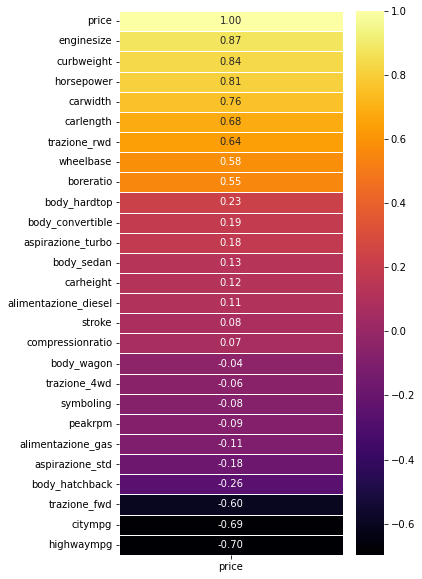

In [39]:
# viene fuori una tabella enorme, filtriamo solo per la target (price)
plt.figure(figsize=(5, 10))
sb.heatmap(
    df.corr()[['price']].sort_values(by='price', ascending=False),
    annot=True, fmt='.2f', cmap='inferno', linewidths=0.5
)
plt.show()

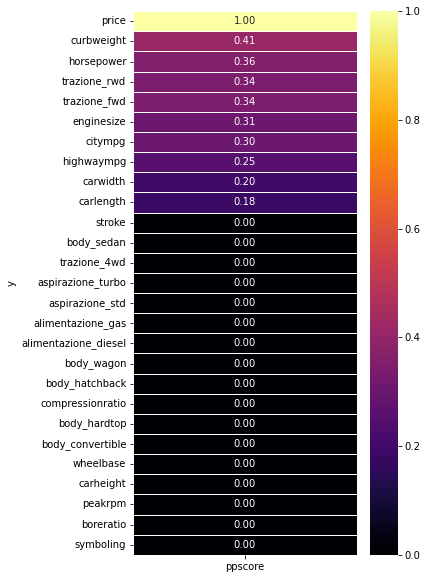

In [40]:
# facendo così vedo però solo le correlazioni lineari, quindi usare PPS (predictive power score) per includere anche quelle non lineari --> range tra 0 e 1

import ppscore

ppdf = ppscore.matrix(df) #dovuto al formato ritornato dal metodo (nuovo dataframe)
ppdf_price = ppdf.loc[ppdf['x']=='price', :] #prendo le colonne dove ho la target
ppdf_price = ppdf_price.set_index('y') #imposto il nuovo indice basandomi sui nomi delle feature

plt.figure(figsize=(5, 10))
sb.heatmap(
    ppdf_price[['ppscore']].sort_values(by='ppscore', ascending=False),
    annot=True, fmt='.2f', cmap='inferno', linewidths=0.5
)
plt.show()

<AxesSubplot:ylabel='Variable'>

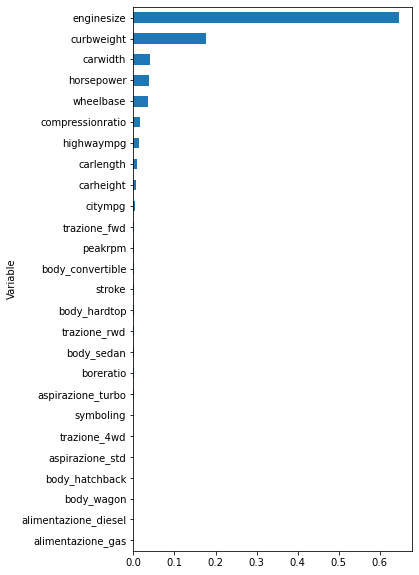

In [41]:
# alcuni modelli (XGBoost tra questi) permettono dentro di loro di accedere alle feature più importanti
importances = gboostmodel.feature_importances_

tmp = pd.DataFrame({'Importance':importances,
                    'Variable':X_names}).sort_values('Importance', ascending=True)

tmp.set_index('Variable').plot(kind='barh', figsize=(5,10), legend=False)

# Parte 9 - Fine Tuning
Il Fine‑Tuning è la "messa‑a‑punto" del modello, cioè il processo in cui i parametri devono essere regolati nel modo più preciso possibile ⚡️

In altre parole, si cerca la combinazione di parametri che massimizza un certo KPI (Key Performance Indicator) 🚀

Se abbiamo un modello con 80% di accuracy (o R2), come possiamo essere sicuri che si tratti di un buon modello e non solo di un colpo di fortuna? 👇🏼

Per assicurarci che il modello sia stabile, cioè che abbia perfomance costante, dobbiamo validarlo.

La tecnica più comune è la K‑Fold Validation ✅

Si tratta di una procedura che consiste nel suddividere il dataset K volte in set di train e validation (cioè mini‑test) e per ogni split il modello viene addestrato e testato 💥

In questo modo è possibile vedere se la performance del modello è costante su diverse partizioni del dataset 👈🏼

In [42]:
# visualizzo i parametri da ottimizzare
# ensemble.GradientBoostingRegressor??

# definizione parametri
param_dic = {
    'learning_rate':[0.15,0.1,0.05,0.01,0.005],
    'n_estimators':[100,250,500,750,1000,1250,1500,1750],  
    'max_depth':[2,3,4,5,6,7],                             
    'min_samples_split':[2,4,6,8,10,20,40,60,100],        
    'min_samples_leaf':[1,3,5,7,9],                        
    'max_features':[2,3,4,5,6,7],           
    'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]
}

#eseguo cross validation
CVsearch = model_selection.RandomizedSearchCV(
            ensemble.GradientBoostingRegressor(),
            param_distributions=param_dic,
            n_iter=10, 
            scoring="r2").fit(x_train, y_train)

best_gboostmodel = CVsearch.best_estimator_
best_gboostmodel

GradientBoostingRegressor(learning_rate=0.15, max_features=6,
                          min_samples_leaf=9, min_samples_split=40,
                          n_estimators=1000, subsample=0.85)

In [43]:
best_gpred = best_gboostmodel.predict(x_test)
best_gpred = scalerY.inverse_transform(best_gpred.reshape(-1, 1)).reshape(-1)

best_gb_r2score = metrics.r2_score(y_test, best_gpred)
print(best_gb_r2score) # score del modello XGBoost con CV
print(f"Aumento di score pari a {best_gb_r2score-gb_r2score}")

0.7582256949977614
Aumento di score pari a -0.12351496119943606


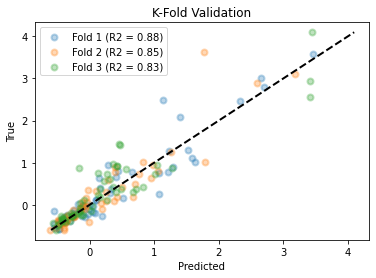

In [44]:
scores = []
cv = model_selection.KFold(n_splits=3)

i = 1
for train, test in cv.split(x_train, y_train):
    prediction = best_gboostmodel.fit(x_train[train], 
                            y_train[train]
                ).predict(x_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1

plt.plot([min(y_train),max(y_train)], 
         [min(y_train),max(y_train)],
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

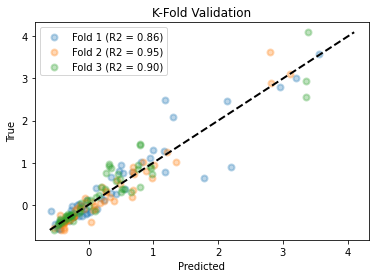

In [45]:
# confronto con il vecchio xgboost --> migliora nonostante lo score appena più alto
scores = []
cv = model_selection.KFold(n_splits=3)

i = 1
for train, test in cv.split(x_train, y_train):
    prediction = gboostmodel.fit(x_train[train], 
                            y_train[train]
                ).predict(x_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1

plt.plot([min(y_train),max(y_train)], 
         [min(y_train),max(y_train)],
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

# Extra - diminuzione feature a quelle con ppscore > 0

In [49]:
df2 = df.loc[:, ['price', 'curbweight', 'horsepower', 'trazione_rwd', 'trazione_fwd', 'enginesize', 'citympg', 'highwaympg', 'carwidth', 'carlength']]

display(df2)

,price,curbweight,horsepower,trazione_rwd,trazione_fwd,enginesize,citympg,highwaympg,carwidth,carlength
0,13495.0,2548,111,1,0,130,21,27,64.1,168.8
1,16500.0,2548,111,1,0,130,21,27,64.1,168.8
2,16500.0,2823,154,1,0,152,19,26,65.5,171.2
3,13950.0,2337,102,0,1,109,24,30,66.2,176.6
4,17450.0,2824,115,0,0,136,18,22,66.4,176.6
...,...,...,...,...,...,...,...,...,...,...
200,16845.0,2952,114,1,0,141,23,28,68.9,188.8
201,19045.0,3049,160,1,0,141,19,25,68.8,188.8
202,21485.0,3012,134,1,0,173,18,23,68.9,188.8
203,22470.0,3217,106,1,0,145,26,27,68.9,188.8


Aumento di score pari a 0.09103621010015306


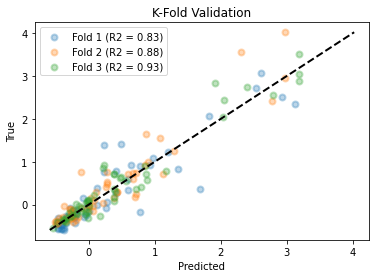

In [50]:
df_train, df_test = model_selection.train_test_split(df2, train_size=0.8, shuffle=True)

scalerX = preprocessing.RobustScaler()
scalerY = preprocessing.RobustScaler()

X_names = df_train.drop('price', axis=1).columns

# scaling variabili nel train
df_train[X_names] = scalerX.fit_transform(df_train[X_names])
# scaling target
df_train['price'] = scalerY.fit_transform(df_train[['price']])

df_test[X_names] = scalerX.transform(df_test[X_names])

x_train = df_train.drop('price', axis=1).values
y_train = df_train['price'].values
x_test = df_test.drop('price', axis=1).values
y_test = df_test['price'].values

param_dic = {
    'learning_rate':[0.15,0.1,0.05,0.01,0.005],
    'n_estimators':[100,250,500,750,1000,1250,1500,1750],  
    'max_depth':[2,3,4,5,6,7],                             
    'min_samples_split':[2,4,6,8,10,20,40,60,100],        
    'min_samples_leaf':[1,3,5,7,9],                        
    'max_features':[2,3,4,5,6,7],           
    'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]
}

CVsearch = model_selection.RandomizedSearchCV(
            ensemble.GradientBoostingRegressor(),
            param_distributions=param_dic,
            n_iter=10, 
            scoring="r2").fit(x_train, y_train)

best_gboostmodel2 = CVsearch.best_estimator_

best_gpred2 = best_gboostmodel2.predict(x_test)
best_gpred2 = scalerY.inverse_transform(best_gpred2.reshape(-1, 1)).reshape(-1)

best_gb_r2score2 = metrics.r2_score(y_test, best_gpred2)

print(f"Aumento di score pari a {best_gb_r2score2-best_gb_r2score}")

scores = []
cv = model_selection.KFold(n_splits=3)

i = 1
for train, test in cv.split(x_train, y_train):
    prediction = best_gboostmodel.fit(x_train[train], 
                            y_train[train]
                ).predict(x_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1

plt.plot([min(y_train),max(y_train)], 
         [min(y_train),max(y_train)],
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()